#  Wafer Fault Prediction on Sensors data

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer.

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

[dataset link] : https://www.kaggle.com/datasets/manavpatel571/wafer-dataset


## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Load the feature store dataset as dataframe

file_path = r"/content/drive/MyDrive/Data/wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)
print("Shape of the feature store dataset: ", wafers.shape)
wafers.head()

Shape of the feature store dataset:  (101, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
wafers.drop(columns = ["Unnamed: 0", 'Good/Bad']).iloc[:100].to_csv("test.csv", index = False)

In [5]:
#replace the column unnamed: 0 as wafer

wafers.rename(columns={"Unnamed: 0": "Wafer"}, inplace= True)

In [6]:
## Train-Test Split

from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size=.20, random_state=42)

In [7]:
## Wafers' Info

wafers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 89 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [8]:
## Description of `wafers`

wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,80.000000,80.00000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,29.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3018.167750,2489.86875,2202.974800,1519.506351,1.204714,100.0,96.771788,0.122121,1.457651,0.001166,...,64.349079,0.499270,0.013896,0.003591,2.784887,0.023507,0.014055,0.004402,71.891140,-0.875000
std,75.240322,71.68715,31.462574,478.331006,0.348814,0.0,5.485404,0.002063,0.071705,0.010317,...,30.913173,0.003393,0.004590,0.000906,0.925522,0.011706,0.007249,0.002329,50.941380,0.487177
min,2825.670000,2254.99000,2114.666700,978.783200,0.758800,100.0,83.423300,0.116000,1.317900,-0.019900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2977.317500,2448.38000,2189.966700,1110.794875,0.866200,100.0,93.547250,0.120800,1.407375,-0.005750,...,46.709200,0.496875,0.011500,0.003100,2.300650,0.013400,0.009000,0.002650,33.654025,-1.000000
50%,3005.360000,2500.19500,2200.988900,1308.647900,1.169400,100.0,99.217800,0.122100,1.451900,0.001900,...,54.476100,0.499400,0.012900,0.003450,2.565150,0.021800,0.012700,0.003800,56.779300,-1.000000
75%,3067.547500,2531.13750,2211.777800,2038.422850,1.383000,100.0,101.062750,0.123375,1.492700,0.009000,...,80.916700,0.501600,0.014825,0.003925,2.980575,0.028025,0.018400,0.005750,93.461075,-1.000000
max,3221.210000,2664.52000,2315.266700,2363.641200,2.141500,100.0,102.362200,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


### Insight:

From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [9]:
## Looking at the Categories in our Target feature

wafers["Good/Bad"].value_counts()

-1    75
 1     5
Name: Good/Bad, dtype: int64

### Insight:

Heavily imbalanced. Definitely gonna need `resampling`.

## # Analyze Missing Data:

Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [10]:
## Check missing vals in target feature

wafers["Good/Bad"].isna().sum()

0

In [11]:
wafers.isna().sum().sum()

1846

In [12]:
## Check missing vals in dependent feature variables

wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1))

0.039043993231810493

### Visualization of Sensors' distribution:

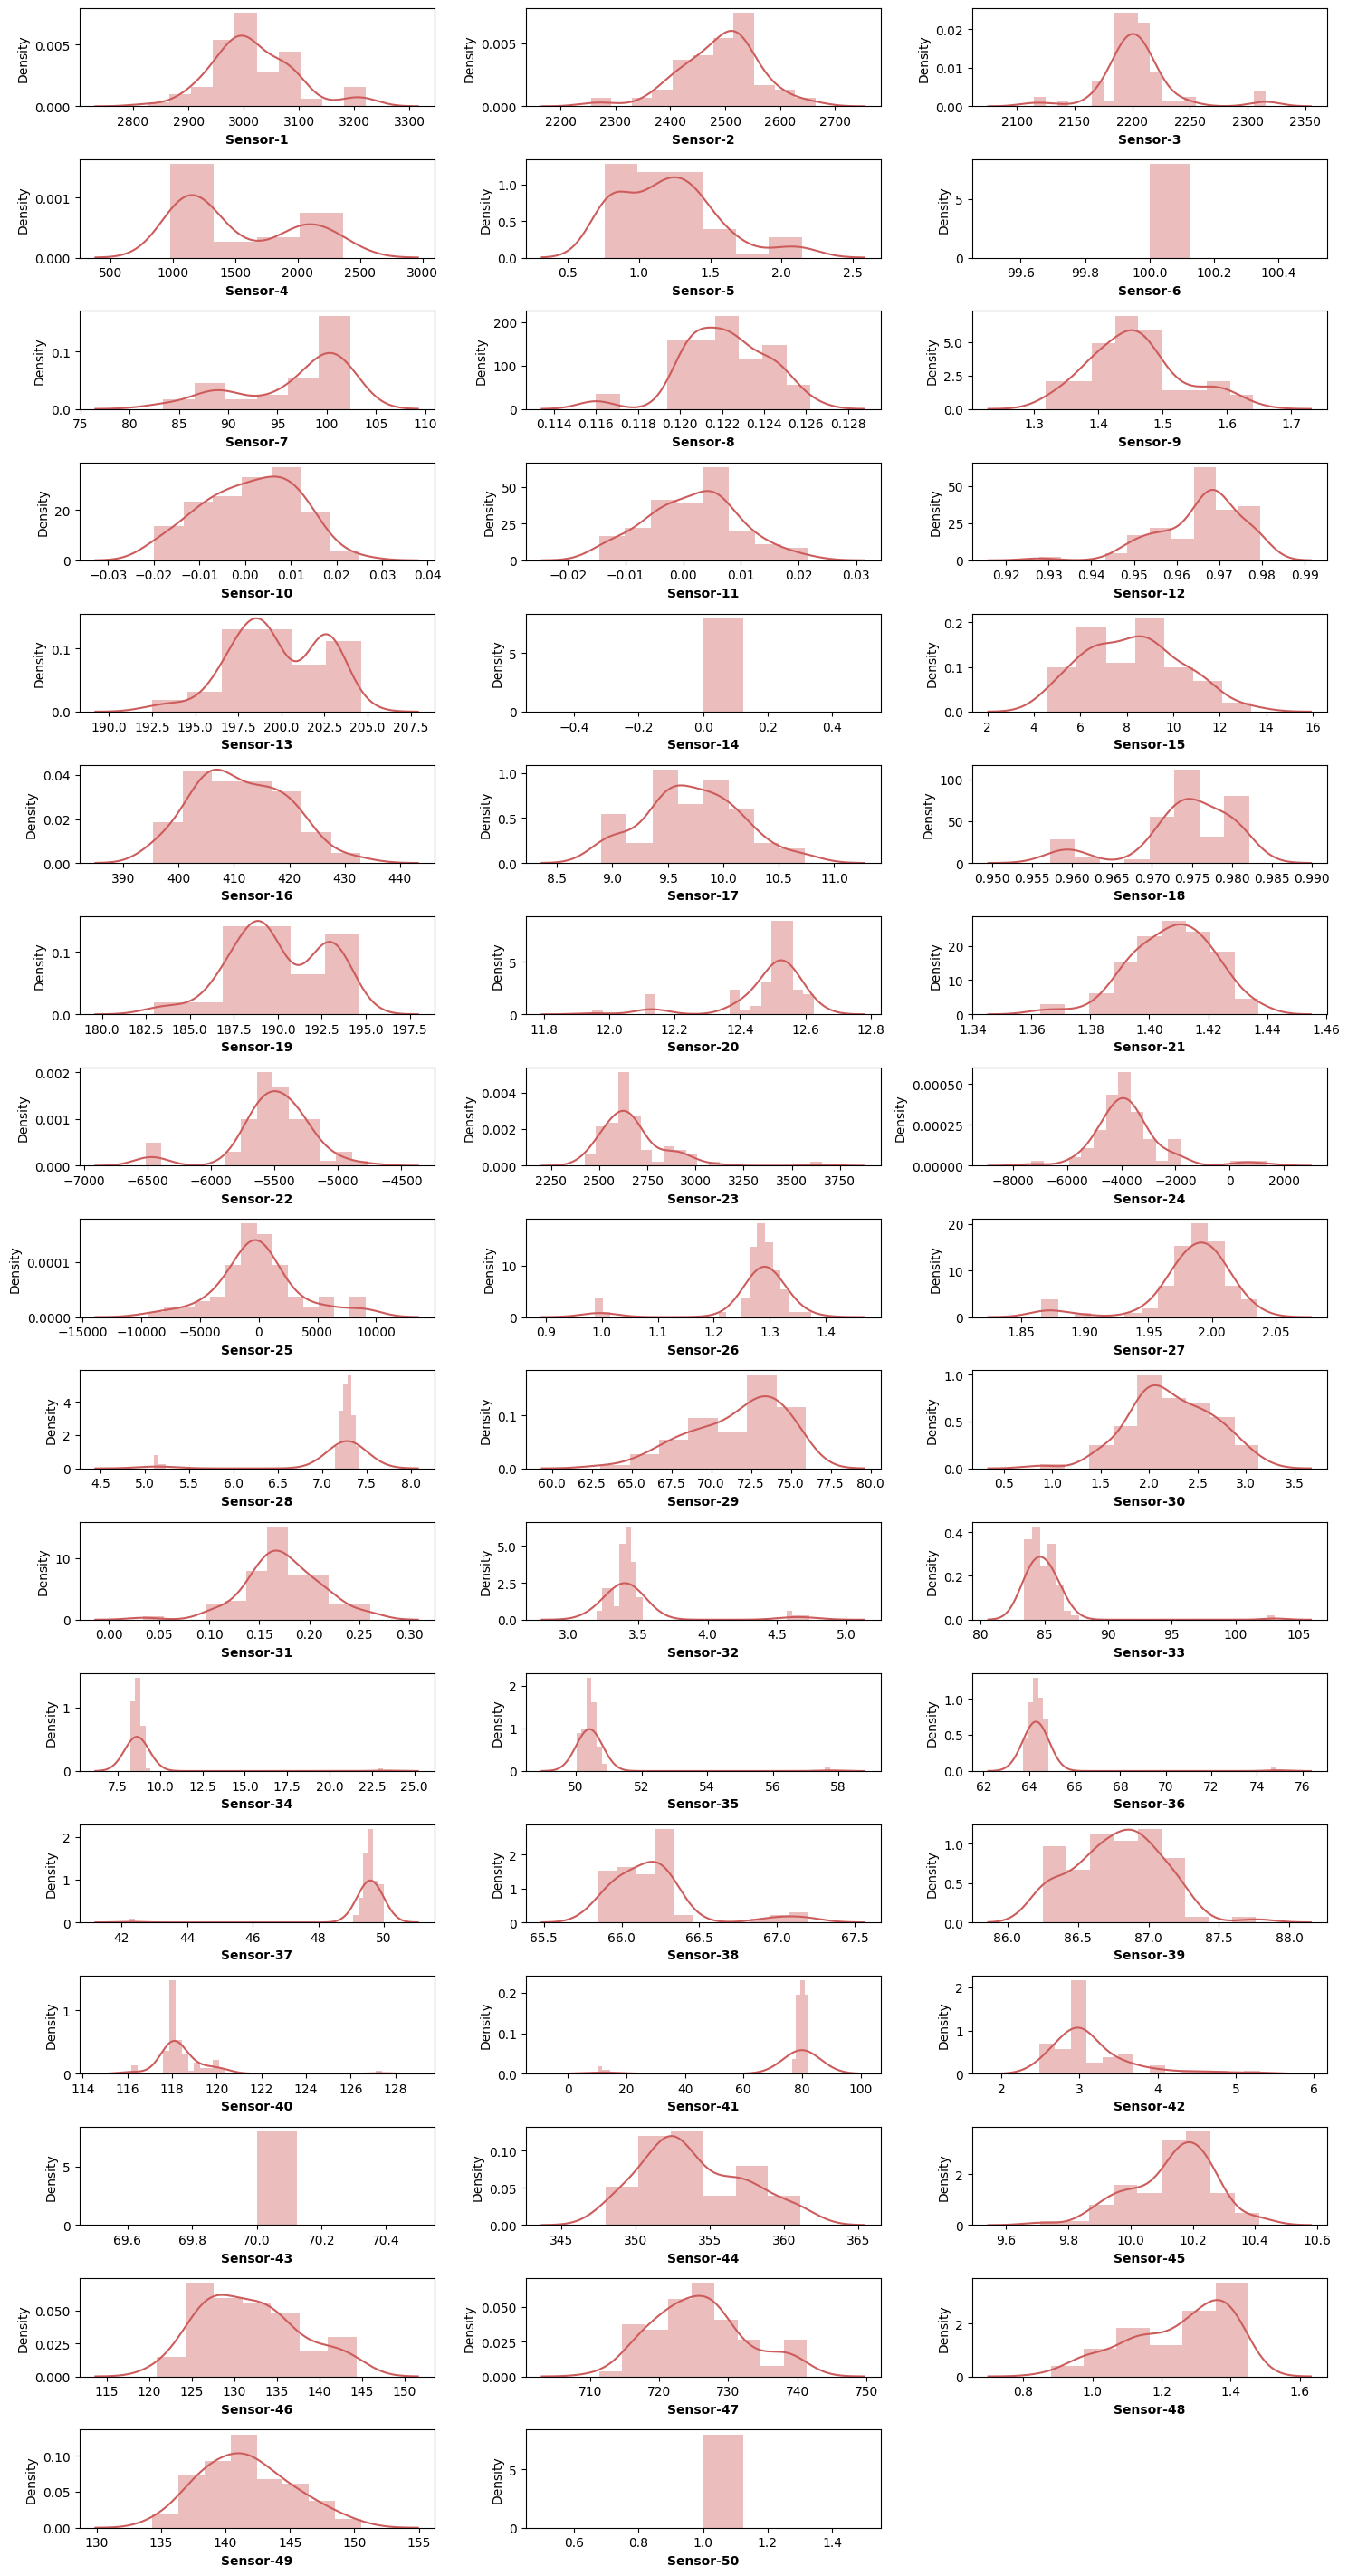

In [13]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [14]:
# Select 50 random sensors

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

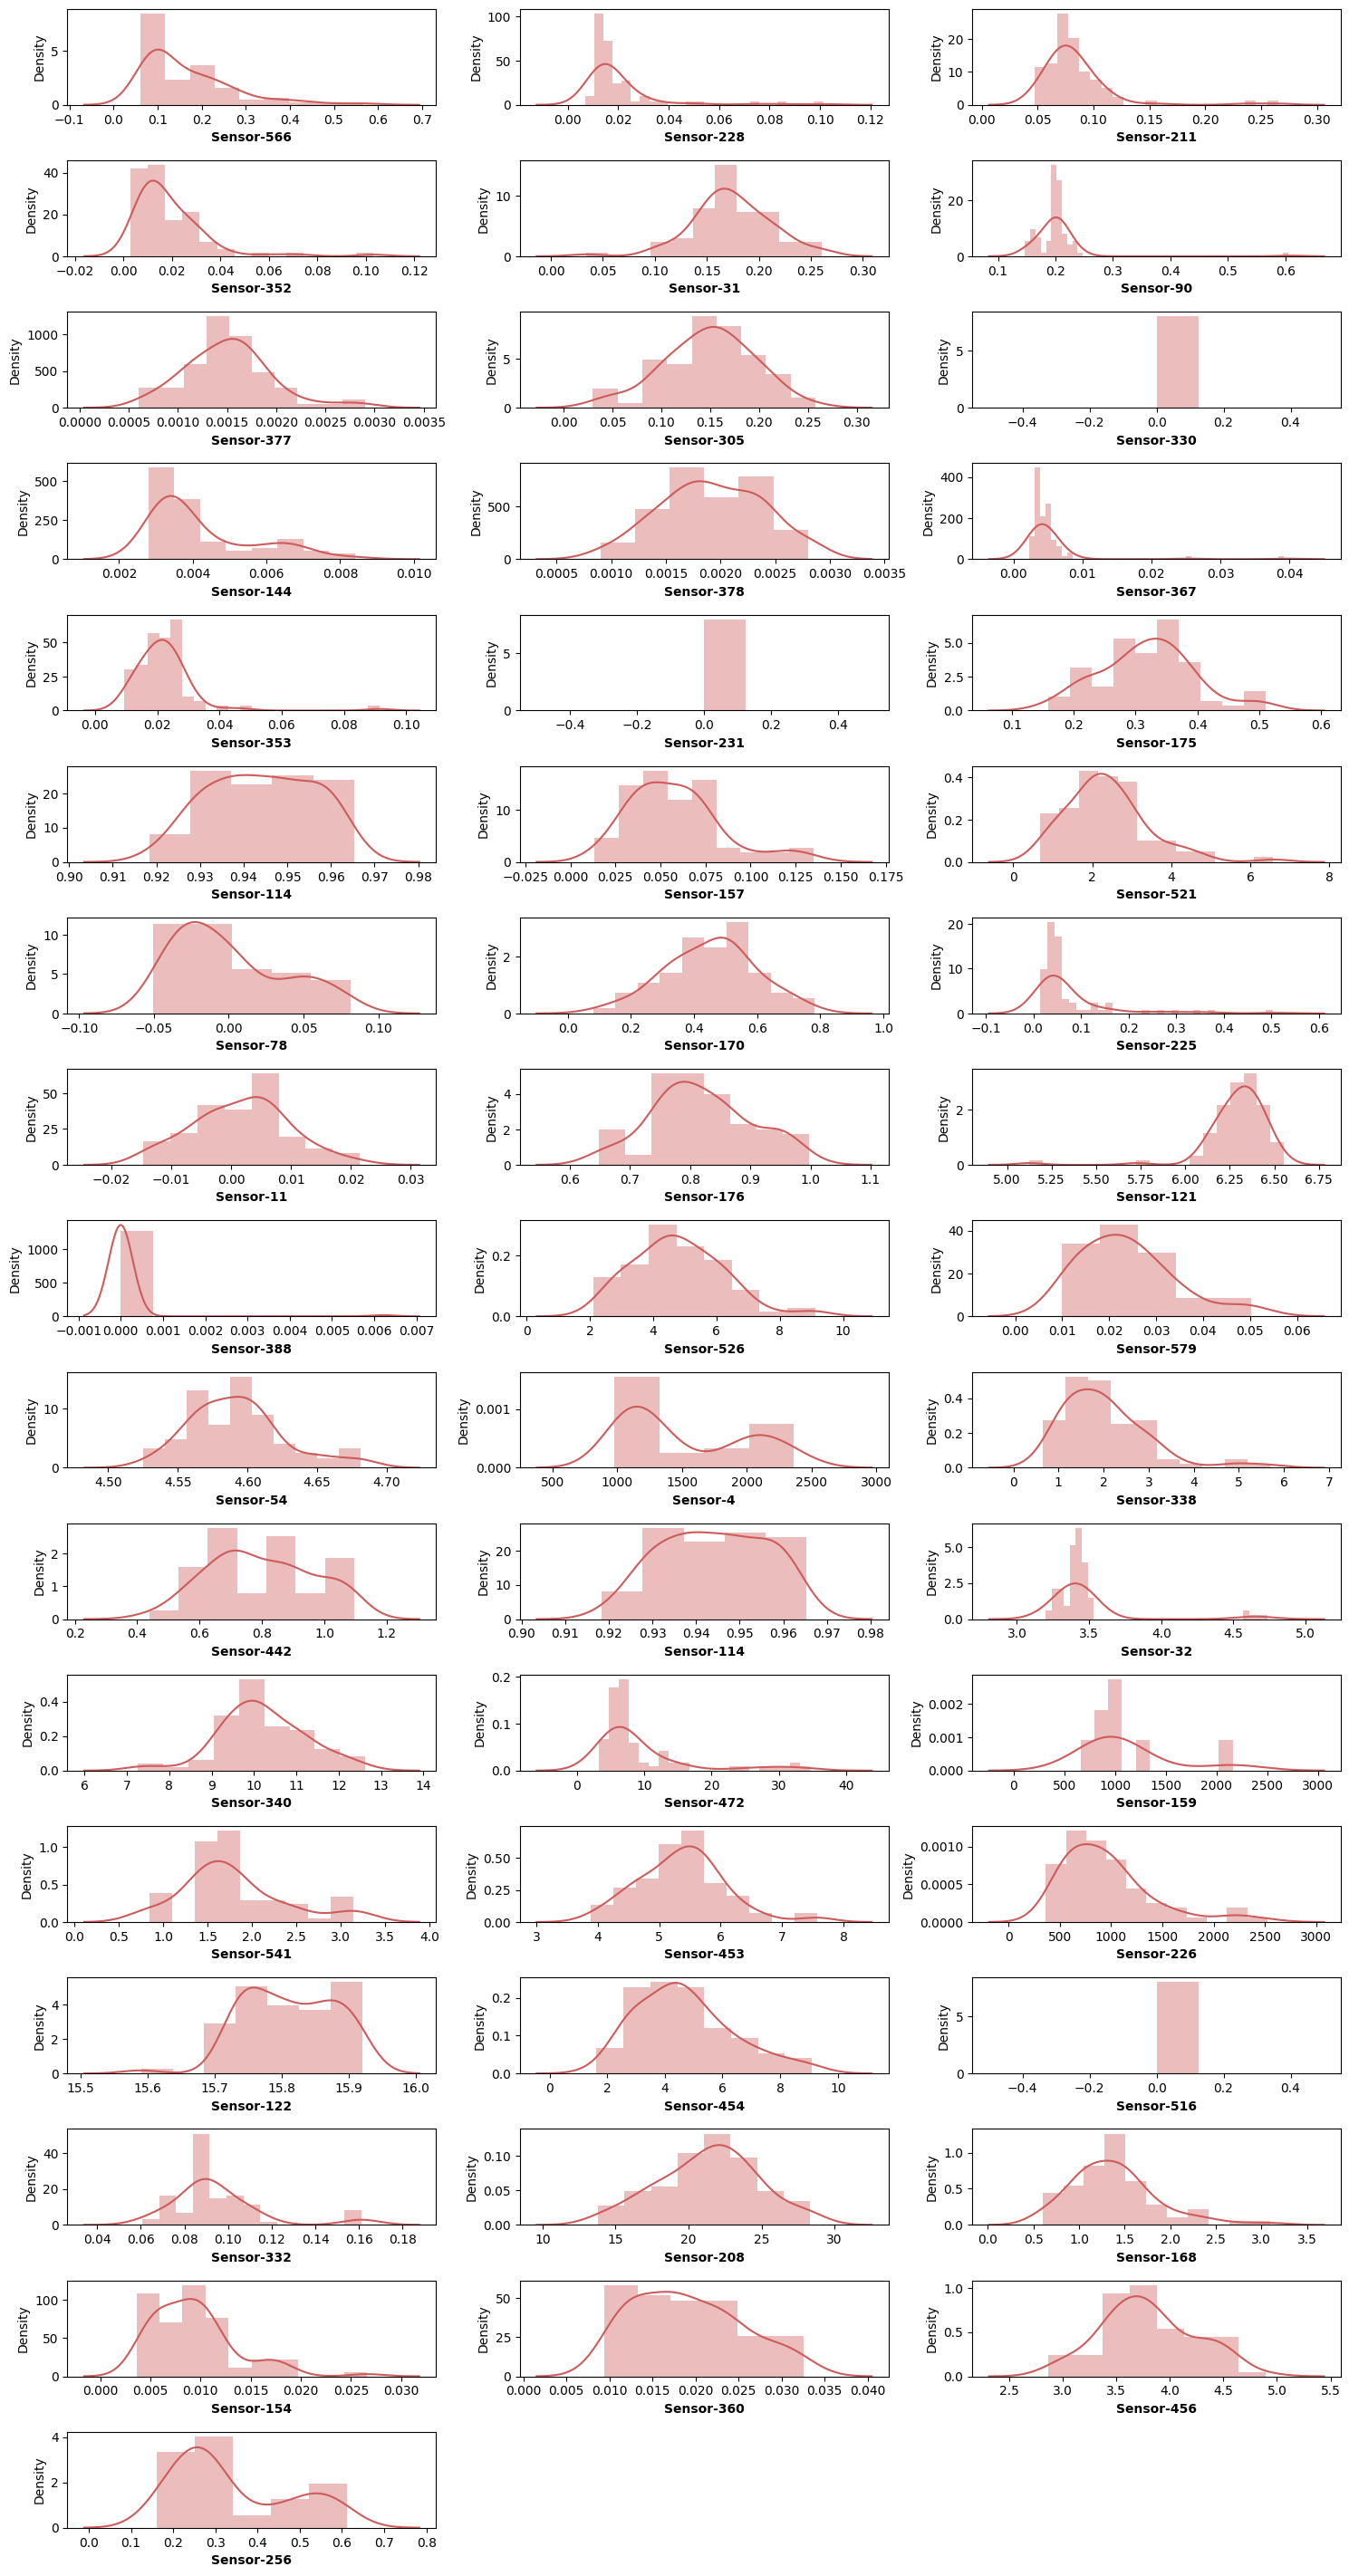

In [15]:
# let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling.

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [16]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop

In [17]:
## Columns w missing vals more than 70%

cols_to_drop_1 = get_redundant_cols(wafers, missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [18]:
## Columns w 0 Standard Deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [19]:
## Cols to drop

cols_to_drop = cols_to_drop_1 + cols_to_drop_2

## # Separate Features and Labels out:

In [20]:
## Separate features and Labels out

X, y = wafers.drop(cols_to_drop, axis=1), wafers[["Good/Bad"]]

In [21]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
89,3000.38,2593.09,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5947,0.0143,-0.0064,...,NaN,0.4994,0.0147,0.0040,2.9498,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
70,3066.38,2473.10,2171.5000,1028.4440,0.7899,101.5122,0.1224,1.3623,-0.0076,0.0112,...,NaN,0.4998,0.0102,0.0031,2.0450,0.0218,0.0054,0.0020,24.6547,-1
15,3017.39,2544.64,2246.5778,1963.8016,1.1665,96.7089,0.1209,1.4959,0.0137,0.0050,...,NaN,0.5005,0.0145,0.0037,2.8905,0.0278,0.0135,0.0042,48.4818,-1


In [22]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head(2)

Shape of the labels:  (80, 1)


,Good/Bad
89,-1
26,-1


## # Data Transformation:

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer', imputer)])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3))])

In [38]:
## Transform "Wafers" features

X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ", X_trans.shape)
X_trans

Shape of transformed features set:  (80, 464)


array([[3.0003800e+03, 2.5930900e+03, 2.1911333e+03, ..., 7.8000000e-03,
        2.2000000e-03, 2.7760100e+01],
       [2.9518500e+03, 2.5250000e+03, 2.1895777e+03, ..., 1.5400000e-02,
        5.6000000e-03, 5.3857700e+01],
       [2.9820700e+03, 2.4470600e+03, 2.1996334e+03, ..., 2.6200000e-02,
        8.9000000e-03, 2.2310180e+02],
       ...,
       [3.0012600e+03, 2.5199200e+03, 2.2246778e+03, ..., 1.3500000e-02,
        4.2000000e-03, 4.8481800e+01],
       [3.0070000e+03, 2.5726200e+03, 2.2132111e+03, ..., 1.4900000e-02,
        4.7000000e-03, 7.6003500e+01],
       [3.0787700e+03, 2.5330400e+03, 2.1874111e+03, ..., 1.2300000e-02,
        3.3000000e-03, 4.6709200e+01]])

## # Resampling of Training Instances:

Resampling is imperative in this case as the target variable is highly imbalanced.

In [39]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
resampler = RandomOverSampler()

X, y = X_trans[:, :-1], y
# resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X, y)

In [40]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 464)
After resampling, Shape of training instances:  (150, 464)


In [41]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 150, 1: 150


In [42]:
y_res.head(2)

,Good/Bad
0,-1
1,-1


In [43]:
y_res['Good/Bad'] = y_res['Good/Bad'].apply(lambda x : 0 if x == -1 else 1)

In [46]:
y_res['Good/Bad'].value_counts()

0    75
1    75
Name: Good/Bad, dtype: int64

### # Prepare the Test set:

Do exactly the same to test set whatever's been done to the test set.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((100, 463), (100, 1))
test set: ((50, 463), (50, 1))


In [48]:
from sklearn import decomposition
pca = decomposition.PCA()

labels = y_train['Good/Bad']

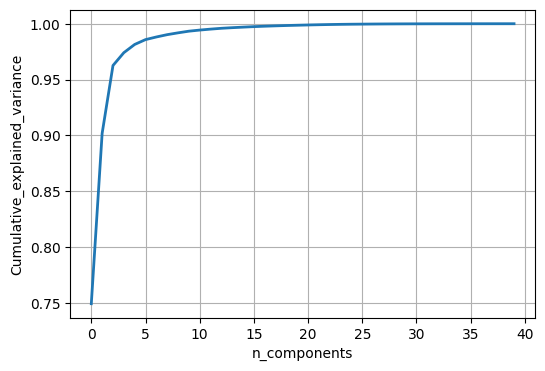

In [49]:
import matplotlib.pyplot as plt

pca.n_components = 40
pca_data = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [50]:
pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 10
pca.n_components = 10
pca_data = pca.fit_transform(X_train)

# pca_reduced will contain the 10-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (100, 10)


In [51]:
# attaching the label for each 10-d data point
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","3rd_principal","4th_principal",
                                              "5th_principal","6th_principal","7th_principal","8th_principal",
                                              "9th_principal","10th_principal","label"))

In [52]:
pca_df.head(2)

,1st_principal,2nd_principal,3rd_principal,4th_principal,5th_principal,6th_principal,7th_principal,8th_principal,9th_principal,10th_principal,label
0,872.416404,4822.081852,1763.062250,-867.602916,-5.127478,-115.103711,-522.045688,172.760421,-10.916079,116.483062,1.0
1,-3906.936148,262.292280,-950.060716,-579.935802,-383.668805,-567.294436,-199.076730,15.456351,403.677289,-474.176766,1.0


In [53]:
X_test = pca.transform(X_test)

In [54]:
X_train=pca_df[["1st_principal", "2nd_principal","3rd_principal","4th_principal",
                                              "5th_principal","6th_principal","7th_principal","8th_principal",
                                              "9th_principal","10th_principal"]]

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
#import Libraries
import numpy as np
import pandas as pd

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
# from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve





In [61]:
y_train = y_train.values
y_test = y_test.values


In [62]:
print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((100, 10), (100, 1))
test set: ((50, 10), (50, 1))


In [63]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column


    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row

    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

## Machine Learning Models

## Building a random model (Finding worst-case log-loss)

Log loss on Test Data using Random Model 0.76159695891595


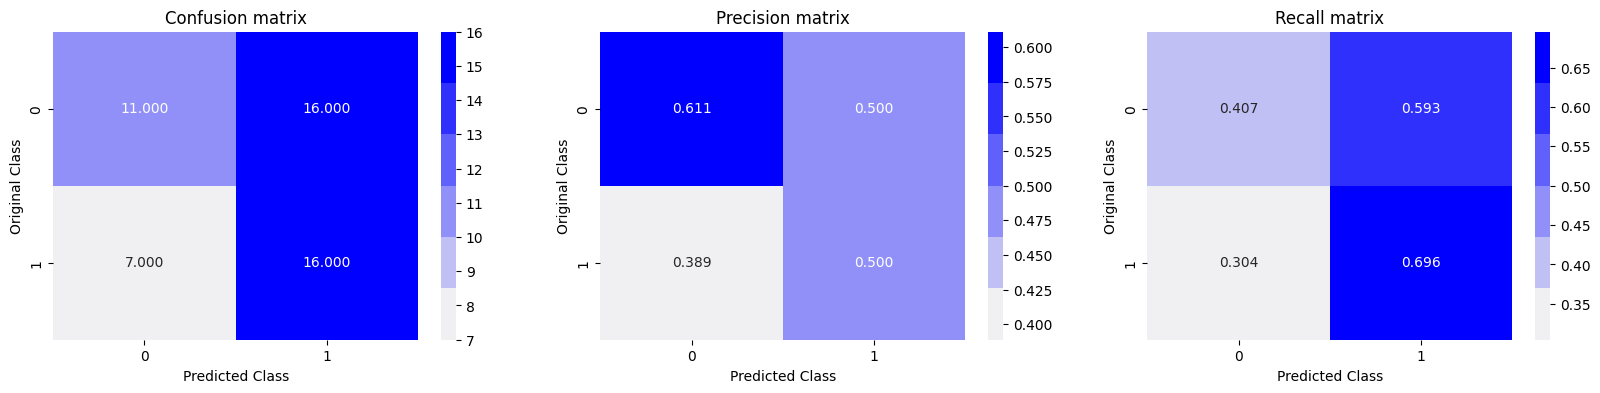

In [64]:
import numpy as np
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

## Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.4914095569363752
For values of alpha =  0.0001 The log loss is: 0.446888541661629
For values of alpha =  0.001 The log loss is: 0.41044652549417443
For values of alpha =  0.01 The log loss is: 0.4544420192531204
For values of alpha =  0.1 The log loss is: 0.41957962621290157
For values of alpha =  1 The log loss is: 0.4076162005900056
For values of alpha =  10 The log loss is: 0.40487678941027255


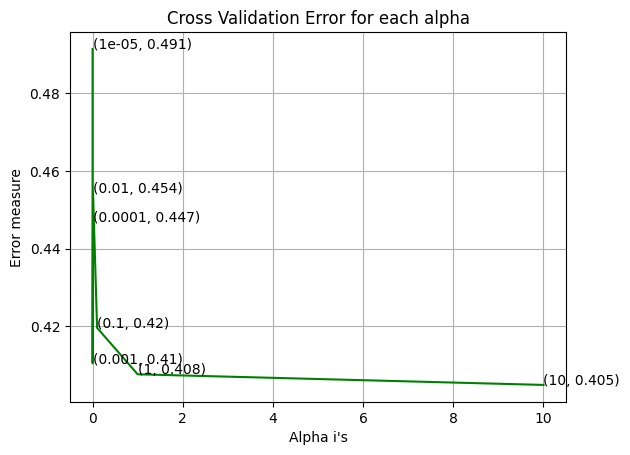

For values of best alpha =  10 The train log loss is: 0.15301679405064056
For values of best alpha =  10 The test log loss is: 0.40487678941027255
Total number of data points : 50


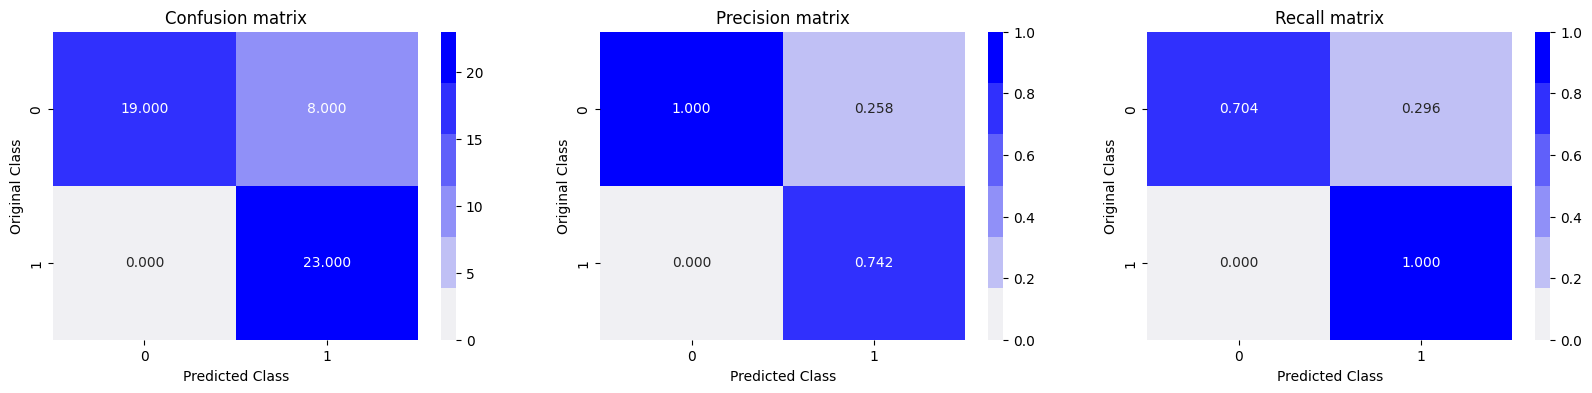

In [65]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.4121083136899339
For values of alpha =  0.0001 The log loss is: 0.4473076847415709
For values of alpha =  0.001 The log loss is: 0.44066064613590006
For values of alpha =  0.01 The log loss is: 0.4049763975682793
For values of alpha =  0.1 The log loss is: 0.3618906073054207
For values of alpha =  1 The log loss is: 0.6970156565675524
For values of alpha =  10 The log loss is: 0.6970156483703076


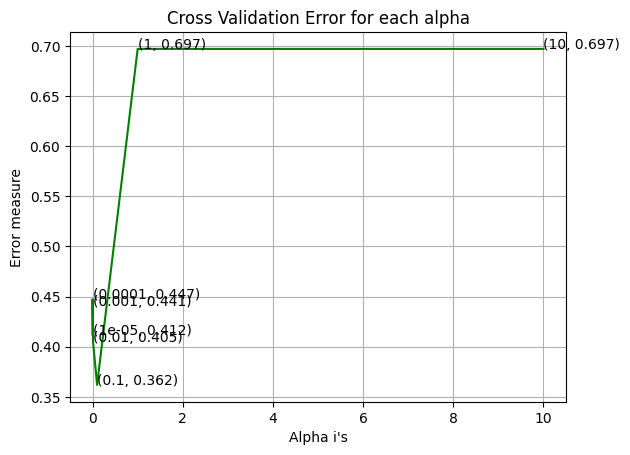

For values of best alpha =  0.1 The train log loss is: 0.18048421006173698
For values of best alpha =  0.1 The test log loss is: 0.3618906073054207
Total number of data points : 50


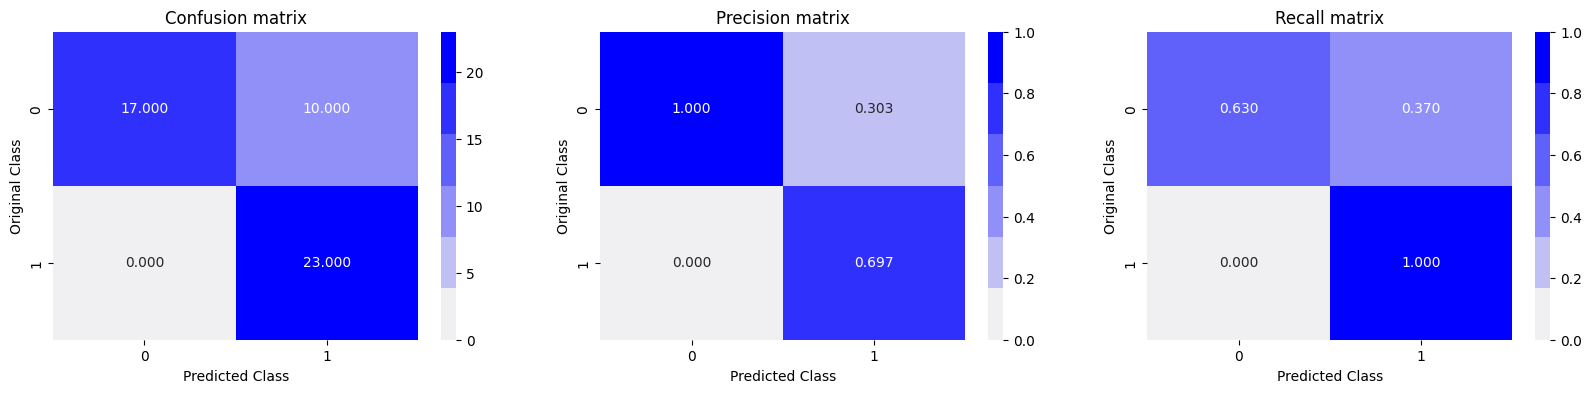

In [66]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [67]:
import pickle
pickle.dump(sig_clf, open('/content/drive/MyDrive/final_prediction.pickle', 'wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/scaler.pickle', 'wb'))